In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import pickle


%matplotlib inline     
sns.set(color_codes=True)

In [2]:
#importing the data
df = pd.read_csv('cardata.csv');
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [3]:
print(df.isnull().values.any())

False


In [4]:
#here we can see a year row, rather than keeping it as an year, we can find the difference between the current year and the year of manufacture
#and store the difference for better analysis
df["Current_Year"]=2022
df["gap_years"]=df["Current_Year"]-df["Year"]
df=df.drop(["Current_Year","Year"],axis=1)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,gap_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [5]:
#We can encode the categorical data
#categorical data features:
#fuel, seller_type, transmission, owner
print(df["Fuel_Type"].value_counts())
print("--------------------\n")
print(df["Seller_Type"].value_counts())
print("--------------------\n")
print(df["Transmission"].value_counts())
print("--------------------\n")
print(df["Owner"].value_counts())
print("--------------------\n")

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
--------------------

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
--------------------

Manual       261
Automatic     40
Name: Transmission, dtype: int64
--------------------

0    290
1     10
3      1
Name: Owner, dtype: int64
--------------------



In [6]:
#find and replace method
cleanup_nums = {"Fuel_Type":     {"Petrol": 0, "Diesel": 1, "CNG":2},
                "Seller_Type": {"Dealer": 0, "Individual": 1},
                "Transmission": {"Manual": 0, "Automatic": 1}
                }

df = df.replace(cleanup_nums)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,gap_years
0,ritz,3.35,5.59,27000,0,0,0,0,8
1,sx4,4.75,9.54,43000,1,0,0,0,9
2,ciaz,7.25,9.85,6900,0,0,0,0,5
3,wagon r,2.85,4.15,5200,0,0,0,0,11
4,swift,4.60,6.87,42450,1,0,0,0,8


Statistical parameters of the dataset labels: 
       Selling_Price  Present_Price     Kms_Driven   Fuel_Type  Seller_Type  \
count     301.000000     301.000000     301.000000  301.000000   301.000000   
mean        4.661296       7.628472   36947.205980    0.212625     0.352159   
std         5.082812       8.644115   38886.883882    0.425801     0.478439   
min         0.100000       0.320000     500.000000    0.000000     0.000000   
25%         0.900000       1.200000   15000.000000    0.000000     0.000000   
50%         3.600000       6.400000   32000.000000    0.000000     0.000000   
75%         6.000000       9.900000   48767.000000    0.000000     1.000000   
max        35.000000      92.600000  500000.000000    2.000000     1.000000   

       Transmission       Owner   gap_years  
count    301.000000  301.000000  301.000000  
mean       0.132890    0.043189    8.372093  
std        0.340021    0.247915    2.891554  
min        0.000000    0.000000    4.000000  
25%        

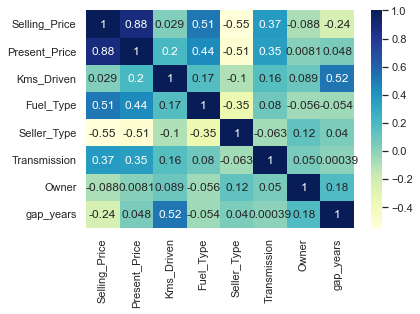

In [7]:
#Visualization
#df.describe() to show the statistical parameters of the dataset's each label
print("Statistical parameters of the dataset labels: ")
print(df.describe())
print('\n')

#creating a correlation matrix and its heatmap
corrMat = df.corr();
print("Correlation Matrix: ");
print(corrMat);
dataplot = sns.heatmap(corrMat, cmap="YlGnBu", annot=True);
print("Heatmap of the Correlation Matrix: ");
plt.show();

In [8]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
training_data_prediction = lin_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8838169193709795


In [9]:
pred_y = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, pred_y)
print(error_score)

0.8401532365378394


In [10]:
pickle.dump(lin_reg_model, open('lin_reg_model.pkl', 'wb'))

In [11]:
pickled_model = pickle.load(open('lin_reg_model.pkl', 'rb'))
print(pickled_model.predict(X_test))
print("---------")
print(X_test)
print("---------")
print(Y_test)

[10.39222503  0.71269634  4.26367425  4.89542882  9.84484784  4.22631808
  7.1173891   7.37327394  0.1592961   5.16712598  6.20624893  6.17414198
  2.11880837  7.74045843  1.92235986  1.71406658  2.02899942  1.8536463
  9.35171759  4.2546458   1.48996098  9.14496453  1.45846216  9.63402658
  0.82165042  8.07898502  1.53763892 -3.19873666  4.22373915  2.09526116
  3.42865389  3.72427545  5.58001877  7.75879392 -1.91563192  6.80980082
  8.20694812  5.81047156  6.15629896  6.27493028 16.02197751  2.07455343
  1.04886513 -0.45830577  6.82090538  6.78567581  0.98725428  6.83257783
 14.31925066  3.01359825  8.04481951 -0.89441322  8.99139759  1.14814903
  2.1191082  -0.82919712  0.68456956 10.02743111 -0.46773344 -2.43254957
 10.0831552 ]
---------
     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
99          20.450       50024          1            0             0      0   
161          0.826       23000          0            1             0      0   
89        